# 기초 그래프 그리기 ― 히스토그램, 산점도, 박스 그래프

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

#Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 
#기본적인 시각화 기능은 Matplotlib 패키지에 의존한다. 

In [2]:
#그래프에 한글이 깨진다면
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:\Windows\Fonts/malgun.TTF").get_name()
rc('font', family=font_name, size=12)

In [3]:
tips = sns.load_dataset("tips") 
print(tips.head())
print(type(tips))
#지불금액, 팁, 성별, 흡연유무, 요일, 시간, 전체인원 

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


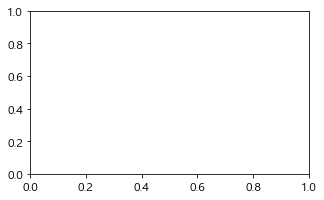

In [4]:
fig = plt.figure(figsize=(5,3)) 
axes1 = fig.add_subplot(1, 1, 1) 

# 일변량 그래프
#히스토그램 : 데이터프레임의 열 데이터분포와 빈도를 살펴보는 용도로 자주 사용한다 

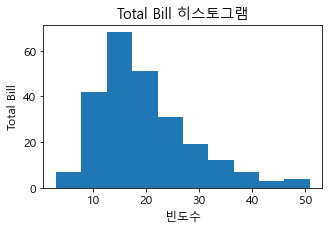

In [5]:
#total_bill,  tip등의 열을 변수라고 한다. 
#변수를 하나만 사용해서 그린 그림을 일변량 그래프라고 한다. 
#이 그래프의 변수  : total_bill

axes1.hist(tips['total_bill'], bins=10) #bins는 X축의 간격 10으로 지정함을 의미 
axes1.set_title('Total Bill 히스토그램')
axes1.set_xlabel('빈도수') 
axes1.set_ylabel('Total Bill') 

fig

# 이변량 그래프
#산점도 그래프 : 변수2개를 사용해서 만든 그래프이다. (이변량 그래프)

Text(0, 0.5, 'Tip')

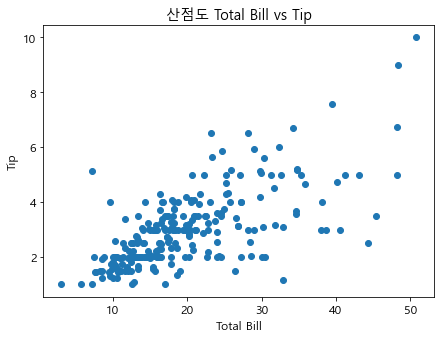

In [6]:

#다음은 total_bill열에 따른 Tip열의 분포를 나타낸 산점도이다. 
#tip과 사용금액(total_bill)과 상관관계가 있는지 알아보기 
scatter_plot = plt.figure(figsize=(7,5)) 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(tips['total_bill'], tips['tip']) 

axes1.set_title('산점도 Total Bill vs Tip') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip')

# 박스 그래프  : 이산형 변수와 연속형 변수를 함께 사용하는 그래프

- 이산형 변수는 Male, Female과 같이 명확하게 구분되는 값을 의미
- 연속형 변수는 Tip과 같이 명확하게 셀 수 없는 범위의 값을 의미 

In [8]:
type(tips[tips['sex'] == 'Female']['tip'])

pandas.core.series.Series

여자 1.0 6.5 2.833448275862069
남자 1.0 10.0 3.0896178343949052


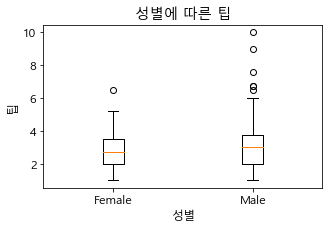

In [9]:
boxplot = plt.figure(figsize=(5,3)) 
axes1 = boxplot.add_subplot(1, 1, 1) 

#성별이 여자인 데이터에서 tip열만 추출하여 리스트에 담음
#성별이 남자인 데이터에서 tip열만 추출하여 리스트에 담음
axes1.boxplot( 
    [tips[tips['sex'] == 'Female']['tip'], 
     tips[tips['sex'] == 'Male']['tip']
    ], 
    labels=['Female', 'Male'])


axes1.set_xlabel('성별') 
axes1.set_ylabel('팁') 
axes1.set_title('성별에 따른 팁')

#최대값, 중간값, 최소값 
a = tips[tips['sex'] == 'Female']['tip']  #여성들의 팁  'pandas.core.series.Series'
b = tips[tips['sex'] == 'Male']['tip']    #남성들의 팁  'pandas.core.series.Series'
print("여자", a.min(), a.max(), a.mean())
print("남자", b.min(), b.max(), b.mean())
#25%아래, 75%이상 

# 다변량 데이터로 다변량 그래프 그리기 ─ 산점도 그래프
- 다변량 그래프 : 3개 이상의 변수를 사용한 그래프 
- 지불금액과 팁으로 산점도를 그렸는데 여기에 성별을 추가하려면 ? 
> 점의 색상을 다르게 한다. 
- 식사비를 추가하려면? 
> 점의 크기를 다르게 한다. 또는 투명도를 조절한다 

In [21]:
def recode_sex(sex):
    if sex == 'Female':
        return 0 
    else:
        return 1

In [22]:
#사용자가 작성한 함수를 한번에 데이터프레임의 각행과 열에 적용하여 실행할 수 있게 해주는 메서드이다. 
tips['sex_color'] = tips['sex'].apply(recode_sex)

In [24]:
tips.columns
tips.sex_color.unique()

[0, 1]
Categories (2, int64): [0, 1]

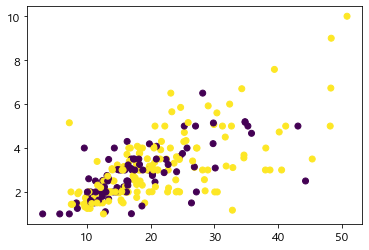

In [26]:
#산점도에 성별추가 
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
#남자, 여자 다른색깔로 ....
axes1.scatter(x=tips['total_bill'], y=tips['tip'], c=tips["sex_color"]) 

In [29]:
type(tips["sex_color"])

pandas.core.series.Series

In [32]:
tips['sex'].dtype

CategoricalDtype(categories=['Male', 'Female'], ordered=False)

Text(0, 0.5, 'Tip')

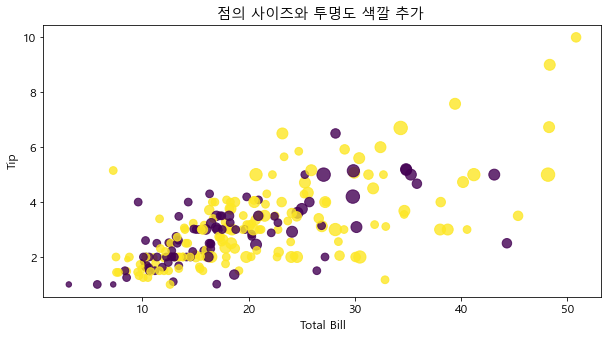

In [34]:
#점의 사이즈와 투명도 색깔 추가 
scatter_plot = plt.figure(figsize=(10,5)) 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*30,
    c=tips['sex_color'],
    alpha=0.8)

axes1.set_title('점의 사이즈와 투명도 색깔 추가 ') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip') 


# seanborn 라이브러리   활용 

## 단변량 그래프 그리기 ― 히스토그램

In [35]:
import seaborn as sns

tips = sns.load_dataset("tips")

Text(0.5, 1.0, 'Total Bill Histogram  밀집도 그래프')

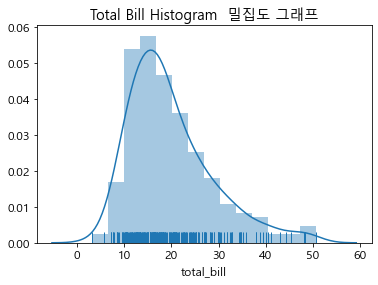

In [36]:
#실무 환경에서는 데이터 시각화를 더 효율적으로 하기 위해 여러 그래프를 한번에 출력한다. 
#distplot : 히스토그램과 밀집도 그래프를 함께 그린다. 

#밀집도 그래프는 주어진 데이터를 정규화시켜서 넓이가 1이 되도록 그린 그래프이다. 
#양탄자그래프 : 그래프의 축에 동일한 길이의 직선을 붙여 데이터의 밀집 정도를 표현한 그래프이다. 
#(#rug=True : 아래부분 )
sns.distplot(tips['total_bill'],rug=True) 
plt.title('Total Bill Histogram  밀집도 그래프')

Text(0, 0.5, 'Frequency')

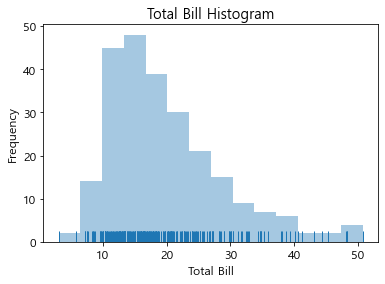

In [37]:
#밀집도 그래프 제거하기  kde=False....사용금액과 빈도 보기   
ax = plt.subplots() 
ax = sns.distplot(tips['total_bill'], kde=False, rug=True) 

ax.set_title('Total Bill Histogram') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Unit Probability')

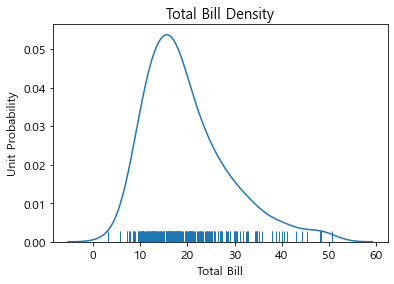

In [38]:
#밀집도 그래프만 그리기  hist=False
ax = plt.subplots() 
ax = sns.distplot(tips['total_bill'], hist=False, rug=True)
ax.set_title('Total Bill Density') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Unit Probability')

Text(0, 0.5, 'Frequency')

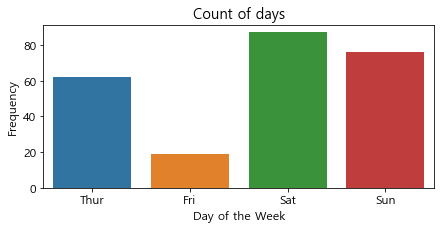

In [39]:
#count 그래프 : 이산값을 나타낸 그래프 ............요일별 빈도수 
ax = plt.subplots( figsize=(7,3) )
ax = sns.countplot('day', data=tips) 

ax.set_title('Count of days') 
ax.set_xlabel('Day of the Week') 
ax.set_ylabel('Frequency') 

## 다양한 종류의 이변량 그래프 그리기

### 1. seaborn 라이브러리로 산점도 그래프 그리기

Text(0, 0.5, 'Tip')

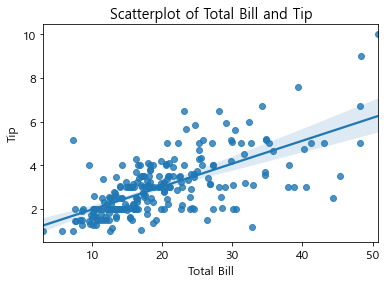

In [40]:

#  회귀선
# ⇒ 산점도가 두 양적 변수들의 직선적 관계를 보여 주고 있다면 
# 그래프 상에 직선을 그어 전체적인 형태를 요약할 수 있다.
# ⇒ 두 변수들 중에 한 변수가 나머지 변수를 설명하거나 예측하는데 도움이 되는 경우에만 
# 회귀선으로 두 변수들의 관계를 요약할 수 있다.(주어진 x의 값에 대하여 y의 값을 예측)

# ⇒ 설명변수 x가 변할 때 반응변수 y가 얼마나 변하는가를 나타내는 직선이다.


#regplot 메서드 이용 ...산점도 그래프와 회귀선을 그린다. 
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips) 

ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')

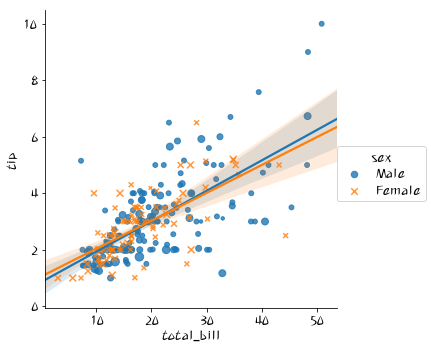

In [45]:
#산점도 그래프의 크기(scatter_kws)와 모양(markers) 조절하기(hue는 색깔 ) 
#fit_reg 옵션으로 회귀선을 제거 fit_reg=False
scatter = sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=True, hue="sex",
                     markers=['o','x'], 
                     scatter_kws={"s":tips["size"]*12})

Text(0.5, 1.03, 'Total Bill과 Tip의 Joint Plot')

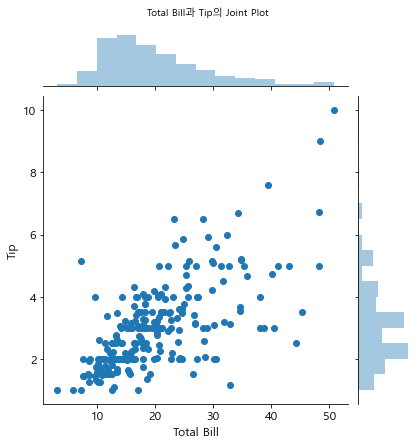

In [14]:
#jointplot : 산점도와 히스토그램을 한번에 그려주는 메서드이다 
joint = sns.jointplot(x='total_bill', y='tip', data=tips ,kind="scatter")   #회귀,커널 밀도 맞추기--kde  
#'scatter', 'reg', 'resid', 'kde', or 'hex'"

joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Total Bill과 Tip의 Joint Plot', fontsize=10, y=1.03)

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

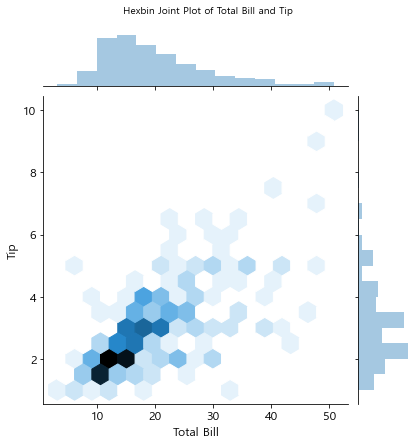

In [15]:
#산점도 그래프는 점이 겹쳐보일 경우 점을 구분하기 어렵다는 단점이 있다.
# 육각그래프(hexbin) 는 산점도 그래프의 데이터를 구분하기 쉽게해준다.
# 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프이다.
# 특정데이터의 개수가 많아지면 점점 진한색으로 표현된다.
# kind="hex"를 추가한다. 
#'scatter', 'reg', 'resid', 'kde', or 'hex'"

hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex") 

hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

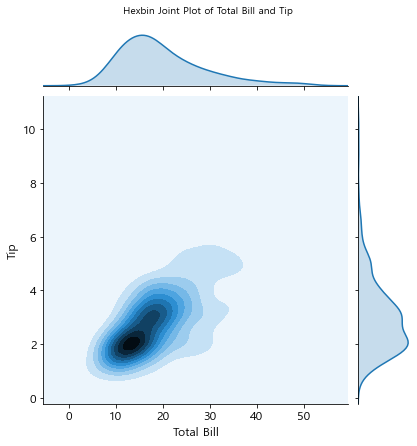

In [16]:
#커널 밀도 히스토그램
# kind="kde"를 추가한다. 

hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde") 

hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

### 4. 이차원 밀집도 그리기

Text(0,0.5,'Tip')

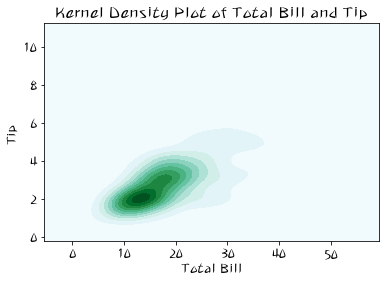

In [68]:
#kdeplot 메서드로 만든다. 
#shade=True 값을 이용하여 음영을 줄 수 있다

kde, ax = plt.subplots() 
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'], 
                 shade=True)

ax.set_title('Kernel Density Plot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

### 5. 바 그래프 그리기

Text(0,0.5,'Average total bill')

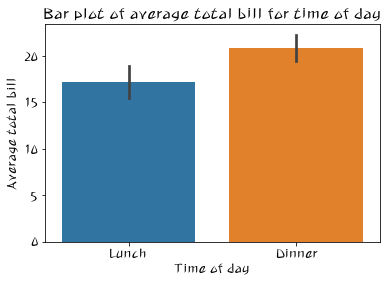

In [63]:
#바그래프는 지정한 변수의 평균을 계산하여 그리기 가능 
#다음은 시간에 따라 지불한 비용의 평균을 바 그래프로 그린 예이다. 
ax = plt.subplots() 
ax = sns.barplot(x='time', y='total_bill', data=tips) 


ax.set_title('Bar plot of average total bill for time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Average total bill')

Text(0,0.5,'Average total bill')

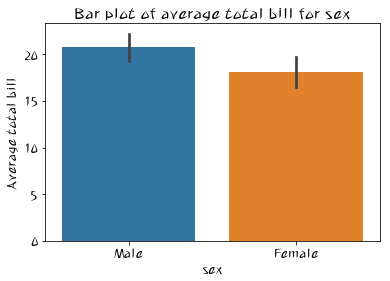

In [64]:
#다음은 성별에 따라 지불한 비용의 평균을 바 그래프로 그린 예이다. 
ax = plt.subplots() 
ax = sns.barplot(x='sex', y='total_bill', data=tips) 
ax.set_title('Bar plot of average total bill for sex') 
ax.set_xlabel('sex') 
ax.set_ylabel('Average total bill')

### 6. 박스 그래프 그리기

Text(0,0.5,'Total Bill')

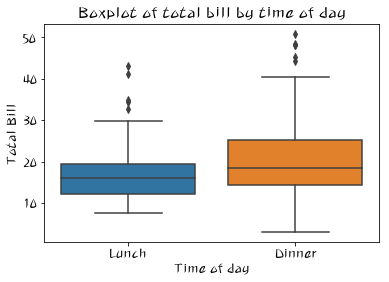

In [65]:
#박스그래프는 최소값, 1분위수, 중간값, 3분위수, 최대값, 이상치 등 다양한 통계량을 한 번에 표현하는 그래프이다. 
#데이터의 분산이 모호하게 표현된다. 
ax = plt.subplots() 
ax = sns.boxplot(x='time', y='total_bill', data=tips) 
ax.set_title('Boxplot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill') 

Text(0,0.5,'Total Bill')

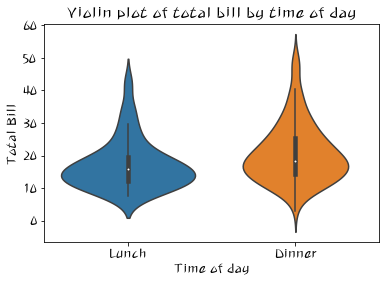

In [66]:
#박스그래프에서 데이터의 분산이 모호하게 표현된다.
#박스그래프에 커널 밀도를 추정한 바이올린 그래프를 사용한다. 

ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', data=tips) 
ax.set_title('Violin plot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')

### 8. 관계 그래프 그리기

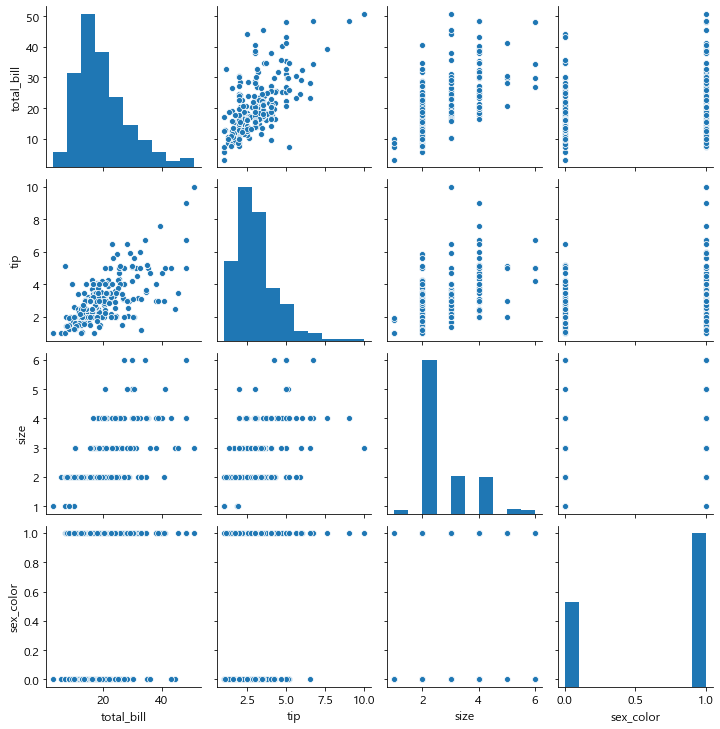

In [17]:
#위의 그래프들을 종합한 그래프 
#중복된 정보가 표현되는 단점이 있다.

fig = sns.pairplot(tips)

## 다변량 그래프 그리기

### 1. seaborn 라이브러리로 바이올린 그래프 그리기 
- 바이올린 플롯은 데이터 세트의 분포를 시각화 해준다.
- 중심선을 따라 대칭인 KDE 플롯이 있다. 
- 가운데 흰색 점은 중앙값(median)을 나타낸다.
- 바이올린 중앙의 두꺼운 선은 사분위 범위를 나타낸다.
- 바이올린 플롯은 KDE 플롯과 Box 플롯을 하나로 합쳐놓은 형태

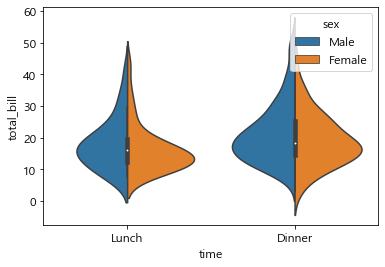

In [20]:
#색상추가 ... hue 
violin, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 
plt.show()

### 2. 산점도, 관계 그래프 그리기 ― 색상 추가

In [ ]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False) 
plt.show()

In [ ]:
#산점도, 관계그래프 그리기 - 색상추가 
fig = sns.pairplot(tips, hue='sex')

### 5. lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기

In [ ]:
#앤스콤4분할 그래프 그리기 
#x와 y에는 
import seaborn as sns 
anscombe = sns.load_dataset("anscombe") 
sns.lmplot(x='x', y='y', data=anscombe,fit_reg=False)#fit_reg=False는 회귀선 없음을 의미 


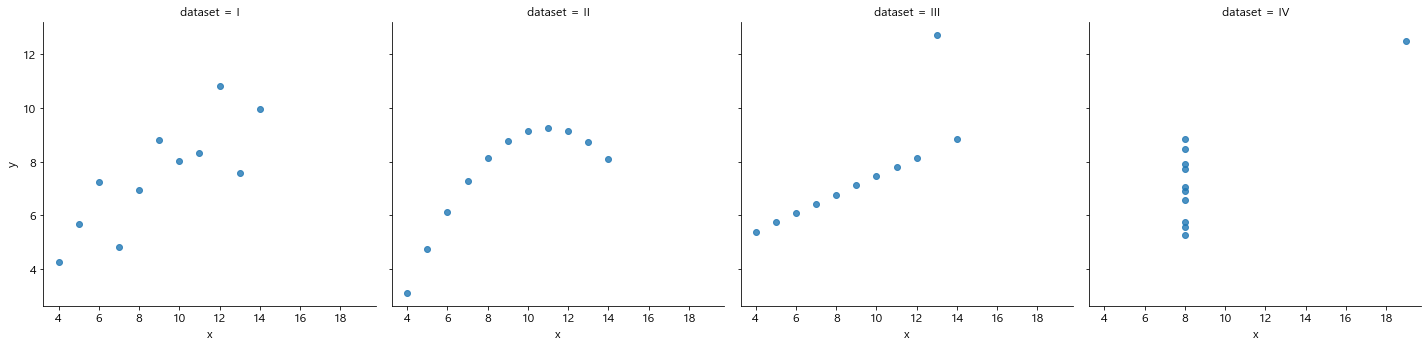

In [22]:
#col_wrap : 그래프를 그릴 열의 최대값을 지정 
sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=4)

## FacetGrid 클래스로 그룹별 그래프그리기 

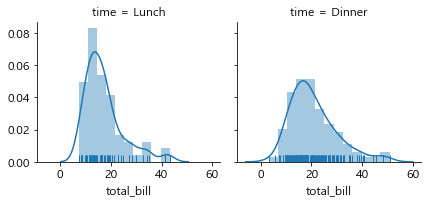

In [23]:
#FacetGrid에 데이터프레임과 그룹을 구분할 열 이름을 전달하여 객체 생성
#map메서드에 그래프의 종류와 x축으로 지정할 열 이름을 전달
#히스토그램, 밀집도, 양탄자그래프를 그린다. 
facet = sns.FacetGrid(tips, col='time') 
facet.map(sns.distplot, 'total_bill', rug=True) 
facet.add_legend()

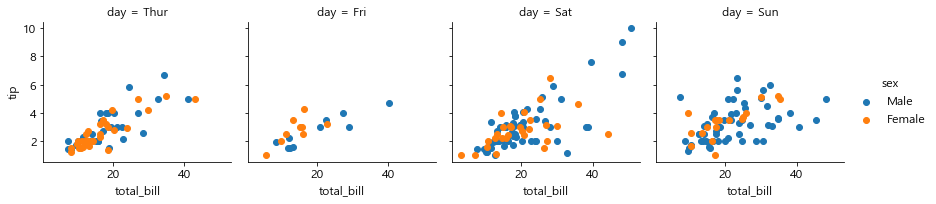

In [24]:
#FacetGrid에 데이터프레임과 그룹을 구분할 열 이름을 전달하여 객체 생성
#map메서드에 그래프의 종류와 x축으로 지정할 열 이름을 전달
#산점도 그래프를 그린다. 
facet = sns.FacetGrid(tips, col='day', hue='sex') 
facet = facet.map(plt.scatter, 'total_bill', 'tip') 
facet = facet.add_legend() 

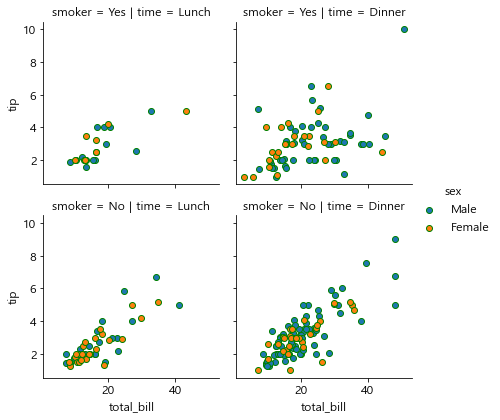

In [25]:
#time과 smoker열을 사용하여 산점도 그래프를 그린다. 
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') 
facet.map(plt.scatter, 'total_bill', 'tip', edgecolor="g") 
facet.add_legend()

## 데이터프레임과 시리즈로 그래프 그리기

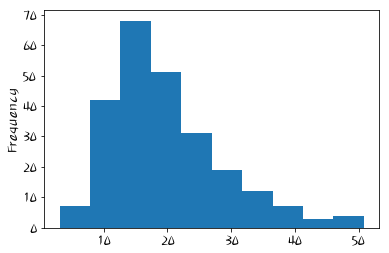

In [81]:
#히스토그램 그리기 
tips['total_bill'].plot.hist() 

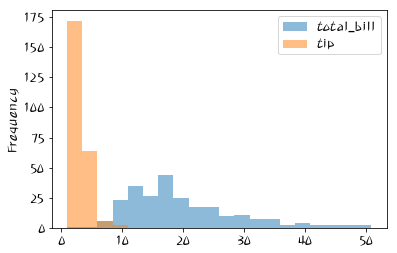

In [82]:
#alpha : 투명도
#bins : x축의 간격 
#ax : 축 
fig, ax = plt.subplots() 
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax) 

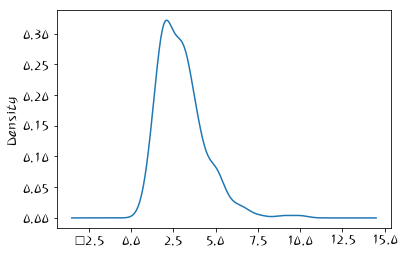

In [83]:
#밀집도 그래프
fig, ax = plt.subplots() 
ax = tips['tip'].plot.kde() 

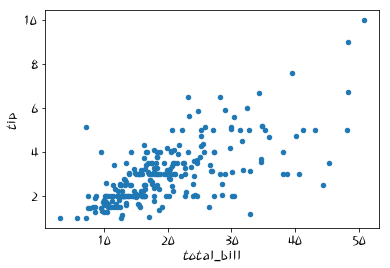

In [84]:
#산점도그래프
fig, ax = plt.subplots() 
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax) 

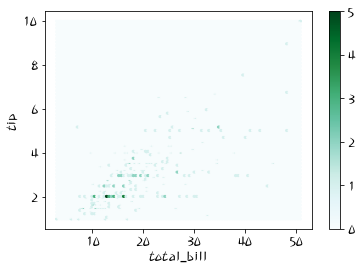

In [85]:
#육각그래프
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax) 

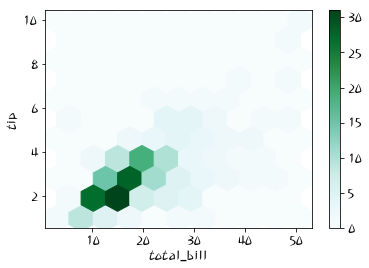

In [86]:
#육각그래프  ...육각형의 크기는 gridsize로 변경 ...숫자가 커지면 육각형이 작아짐 
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax) 

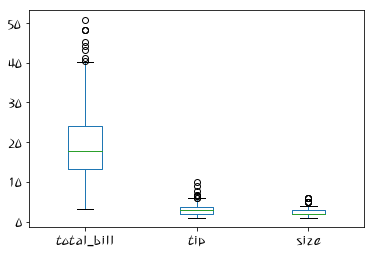

In [87]:
#박스그래프 
fig, ax = plt.subplots() 
ax = tips.plot.box(ax=ax) 

## 그래프에 스타일 적용하기

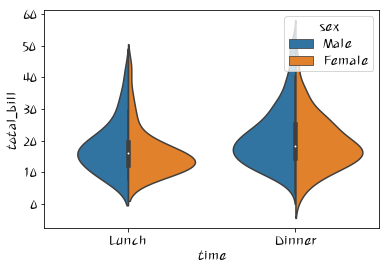

In [88]:
#기본스타일의 그래프 
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 

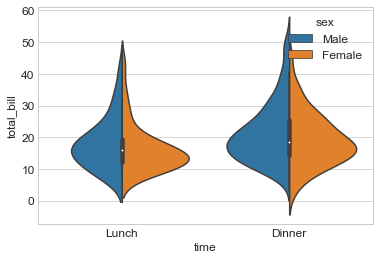

In [89]:
#seaborn 라이브러리 스타일은 darkgrid, whitegrid, dark, white, ticks 로 5가지 종류가있다. 
#whitegrid : 그래프의 배경에 가로줄이 생긴다. 
sns.set_style('whitegrid') 
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 

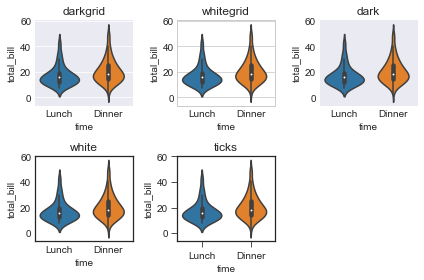

In [172]:
fig = plt.figure() 
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks'] 
for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style) 
        
fig.tight_layout() 